# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [38]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [39]:
data1 = pd.read_excel('geo_comment.xlsx')
data2 = pd.read_excel('geo.xlsx')

In [40]:
data1

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
...,...,...,...,...,...,...
70377,70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...
70378,70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...
70379,70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл..."
70380,70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...


In [41]:
data2

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1
...,...,...,...,...
108801,108801,37.454528,55.792331,-1
108802,108802,37.384325,55.899068,-1
108803,108803,37.421066,55.848756,1
108804,108804,37.448509,55.793065,-1


In [42]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [44]:
scaler = StandardScaler()

In [45]:
df1 = data1[['x', 'y']]
X_scaled = scaler.fit_transform(df1)

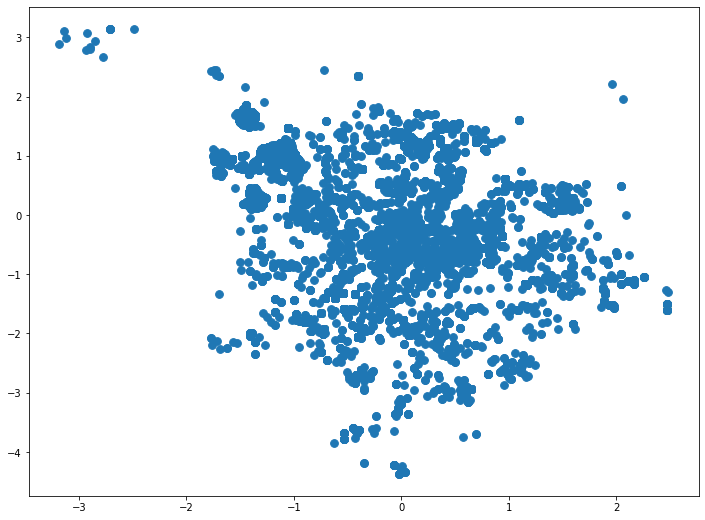

In [46]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=60)

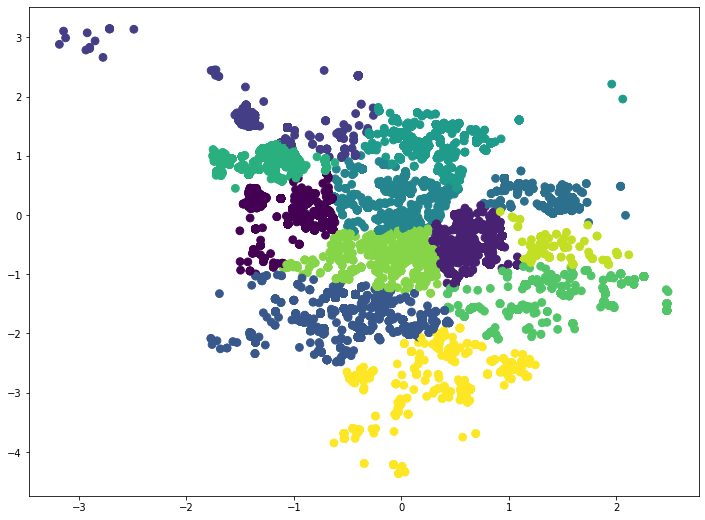

In [47]:
cl = KMeans(n_clusters=12).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

In [48]:
def find_clasters(X_scaled, model):
    
    k_inertia = []
    ks = range(1,10)

    for k in ks:
        algorithm = model(n_clusters=k)
        clusters_ = algorithm.fit_predict(X_scaled)
        k_inertia.append(algorithm.inertia_)

    plt.plot(ks, k_inertia)
    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    k_opt = ks[np.argmin(diff_r)+1]
    print(f"оптимальное количество кластеров: {k_opt}")

оптимальное количество кластеров: 2


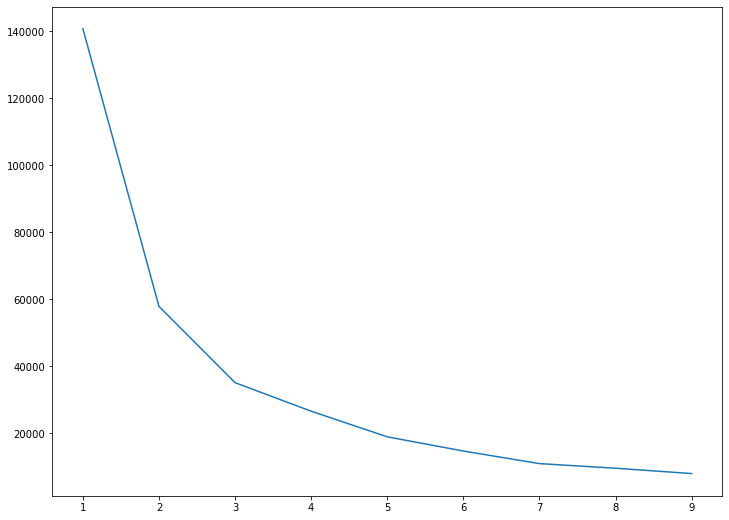

In [49]:
find_clasters(X_scaled, KMeans)

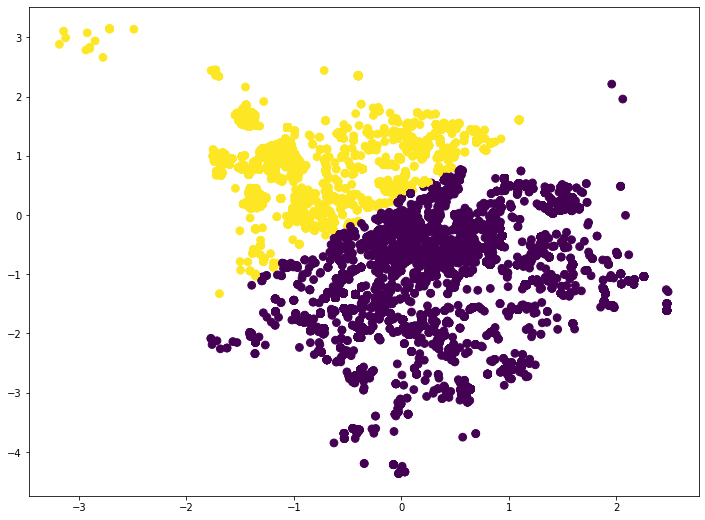

In [50]:
cl = KMeans(n_clusters=2).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

In [51]:
df2 = data1[data1['comment_class'] == 1][['x', 'y']]
X_scaled = scaler.fit_transform(df2)

оптимальное количество кластеров: 3


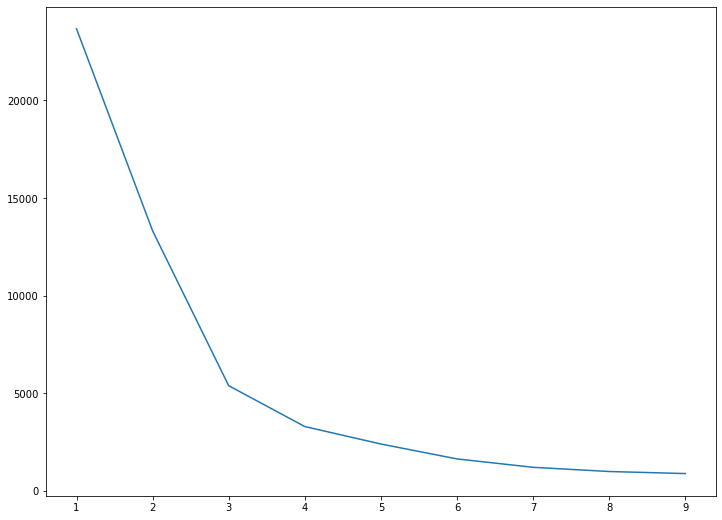

In [52]:
find_clasters(X_scaled, KMeans)

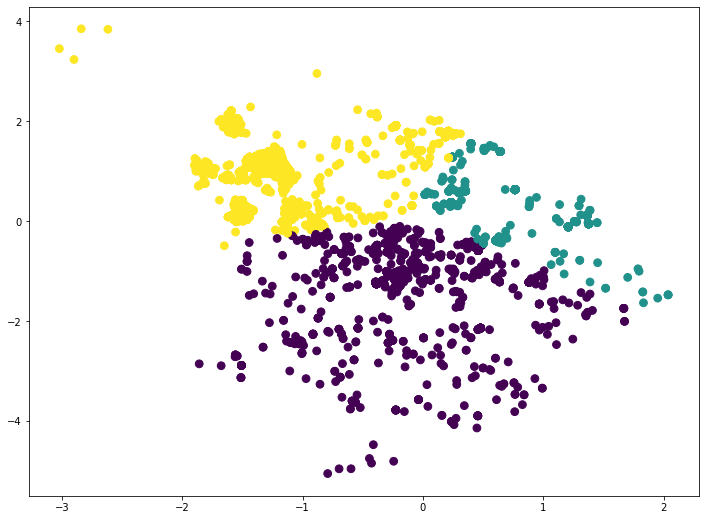

In [53]:
cl = KMeans(n_clusters=3).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)